<a href="https://colab.research.google.com/github/JorgeLZ13/pesquisa_operacional/blob/main/lista_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

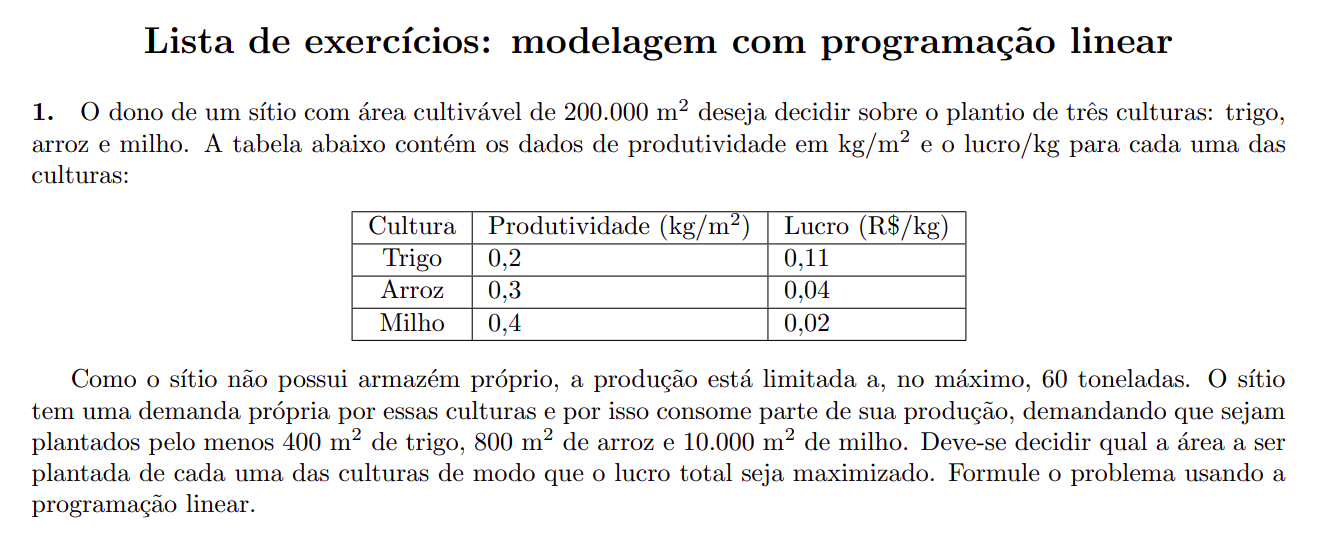

In [1]:
# instalação e importação do pacote mip
!pip install mip

from mip import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 35.3 MB/s eta 0:00:00


In [3]:
prod = {'t': 0.2, 'a': 0.3, 'm': 0.4}
lucro = {'t': 0.11, 'a': 0.04, 'm': 0.02}
min_area = {'t': 400, 'a': 800, 'm': 10000}

max_prod = 60000
max_area = 200000

In [4]:
model = Model(sense=MAXIMIZE, solver_name=CBC)   # implementa modelo

x = [model.add_var(var_type=CONTINUOUS, name=f"x_{i}", lb=0) for i in range(3)]

model.objective = lucro['t']*x[0] + lucro['a']*x[1] + lucro['m']*x[2]

model += x[0]/prod['t'] + x[1]/prod['a'] + x[2]/prod['m'] <= max_area

model += x[0]/prod['t'] >= min_area['t']
model += x[1]/prod['a'] >= min_area['a']
model += x[2]/prod['m'] >= min_area['m']

model += x[0] + x[1] + x[2] <= max_prod

model.write("model.lp") # salva modelo em arquivo
with open("model.lp") as f: # lê e exibe conteúdo do arquivo
  print(f.read())

\Problem name: 

Minimize
OBJROW: -0.11000 x_0 -0.04000 x_1 -0.02000 x_2
Subject To
constr(0):  5 x_0 + 3.33333 x_1 + 2.50000 x_2 <= 200000
constr(1):  5 x_0 >= 400
constr(2):  3.33333 x_1 >= 800
constr(3):  2.50000 x_2 >= 10000
constr(4):  x_0 + x_1 + x_2 <= 60000
Bounds
End



In [5]:
def solve(model):
  status = model.optimize()

  print("Status = ", status)
  print(f"Solution value  = {model.objective_value:.2f}\n")
  
  print("Solution:")
  for v in model.vars:
      print(f"{v.name} = {v.x:.2f}")

solve(model)

Status =  OptimizationStatus.OPTIMAL
Solution value  = 4252.00

Solution:
x_0 = 37840.00
x_1 = 240.00
x_2 = 4000.00


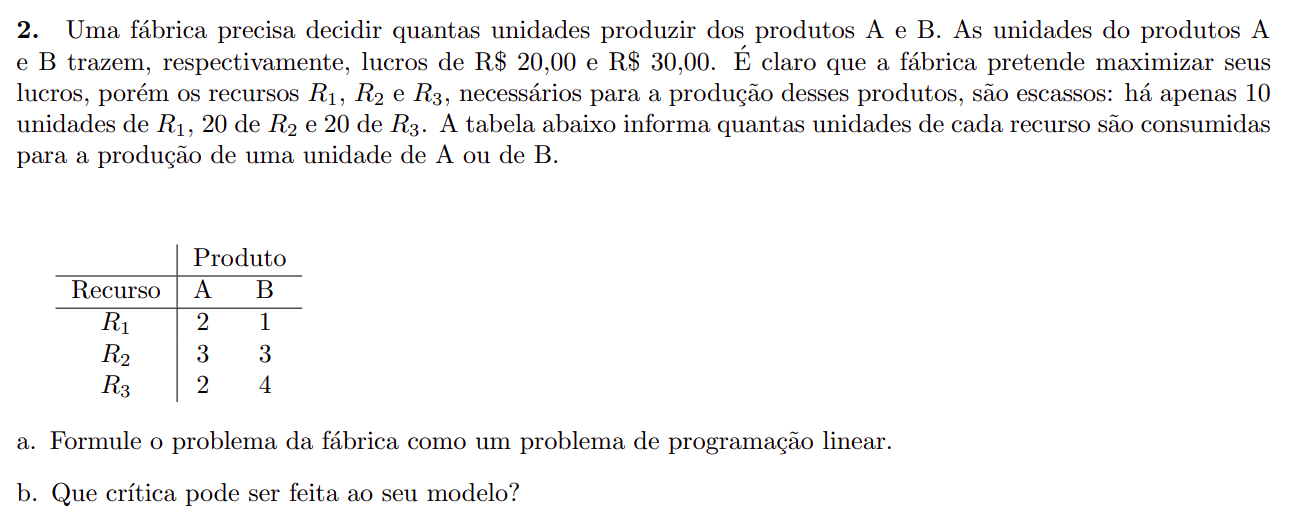

In [8]:
lucro = {'A': 20, 'B': 30}
r = {'1': 10, '2': 20, '3': 20}

In [9]:
model = Model(sense=MAXIMIZE, solver_name=CBC)   # implementa modelo

x = [model.add_var(var_type=CONTINUOUS, name=f"x_{i}", lb=0) for i in range(2)]

model.objective = lucro['A']*x[0] + lucro['B']*x[1]

model += 2*x[0] + x[1] <= r['1']
model += 3*x[0] + 3*x[1] <= r['2']
model += 2*x[0] + 4*x[1] <= r['3']

model.write("model.lp") # salva modelo em arquivo
with open("model.lp") as f: # lê e exibe conteúdo do arquivo
  print(f.read())

\Problem name: 

Minimize
OBJROW: -20 x_0 -30 x_1
Subject To
constr(0):  2 x_0 + x_1 <= 10
constr(1):  3 x_0 + 3 x_1 <= 20
constr(2):  2 x_0 + 4 x_1 <= 20
Bounds
End



In [10]:
def solve(model):
  status = model.optimize()

  print("Status = ", status)
  print(f"Solution value  = {model.objective_value:.2f}\n")
  
  print("Solution:")
  for v in model.vars:
      print(f"{v.name} = {v.x:.2f}")

solve(model)

Status =  OptimizationStatus.OPTIMAL
Solution value  = 166.67

Solution:
x_0 = 3.33
x_1 = 3.33


b) Realizar as restrições do modelo utilizando um ciclo 'for'